In [1]:
import matplotlib.pylab as plt
import xarray 
import pandas as pd
import numpy as np
from matplotlib import cm
import cartopy.feature as cfeature
import matplotlib.pylab as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset
from cartopy.util import add_cyclic_point
import cmocean

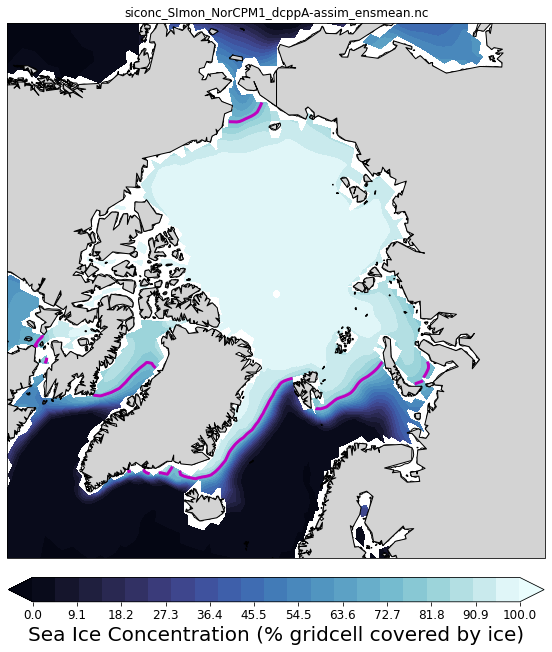

In [6]:
path='D:/TRABAJO/DATA/NORcpm/assim/siconc/'
filename= 'siconc_SImon_NorCPM1_dcppA-assim_ensmean.nc'
       
fl= Dataset(path+filename)
        
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]
st  = fl.variables['siconc'][:, :, :]
        
st= np.mean(st,axis=0)        
air=np.squeeze(st)
        
        
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)
        
        
lon2d, lat2d = np.meshgrid(lon_cyc, lat)
        
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.coastlines(resolution = '50m')
ax.set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale="coarse", facecolor="lightgray"))
image= ax.contourf(lon2d, lat2d, air_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(0,100,22),
                           cmap=cmocean.cm.ice,
                           extend='both')
       
image2=ax.contour(lon2d, lat2d, air_cyc, transform=ccrs.PlateCarree(),
                           levels=np.linspace(75,75,1),
                           colors='g',
                           origin='lower',linewidths=3)
cb = plt.colorbar(image,ticks=np.linspace(0,100,12), orientation='horizontal', pad=0.03, shrink = 0.8)
cb.ax.tick_params(labelsize=12)
cb.set_label('Sea Ice Concentration (% gridcell covered by ice)', size=20)
plt.title(filename)
plt.savefig(path+filename+'.png')
        
        
